# Actividad - Ecuaciones diferenciales

In [11]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
%matplotlib inline

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [7]:
def f(t,x):
    return x/(t+1)

Grafique con condición inicial $x_0 = 2$

In [13]:
x0 = np.array([2])
tspan = [0, 10]

x2 = solve_ivp(f, tspan, x0, max_step=0.1)
x2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  1.000e+01  1.000e+01]
        y: [[ 2.000e+00  2.200e+00 ...  2.200e+01  2.200e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 608
     njev: 0
      nlu: 0

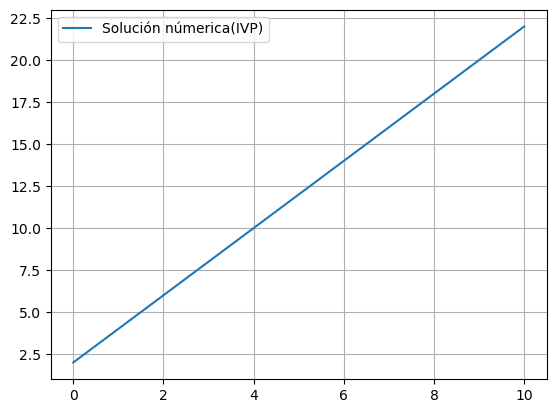

In [15]:
plt.figure()
plt.plot(x2.t, x2.y[0, :], label="Solución númerica(IVP)")
plt.legend(loc="best")
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [27]:
solve_ivp?

In [29]:
x0 = np.array([0.5, 0.1])
w0 = 3
t = [0, 20]
def dX(t, X) :
    # X contiene [x, dx]
    x = X[0]
    dx = X[1]
    d2x = -w0**2*x
    return [dx, d2x]

s = solve_ivp(dX, t, x0, max_step=0.1)
s

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.155e-02 ...  1.993e+01  2.000e+01]
        y: [[ 5.000e-01  5.009e-01 ... -5.007e-01 -4.863e-01]
            [ 1.000e-01 -4.222e-02 ...  5.688e-02  3.620e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1208
     njev: 0
      nlu: 0

Grafique

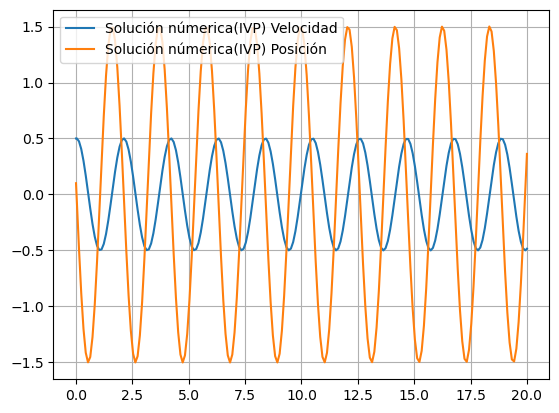

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(s.t, s.y[0, :], label="Solución númerica(IVP) Velocidad")
plt.plot(s.t, s.y[1, :], label="Solución númerica(IVP) Posición")
plt.legend(loc="best")
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [40]:
x0 = np.array([0.5])
v0 = np.array([0.1])
w0 = 3

def posicion(t, w0, x0, v0):
    A = x0
    B = v0/w0
    return A*np.cos(w0*t) + B*(np.sin(w0*t))

def velocidad(t, w0, x0, v0):
    A = x0
    B = v0/w0
    return w0*(-A*np.sin(w0*t) + B*(np.cos(w0*t)))

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [ ]:
def graficar(t=10) :
    d = posicion(t, w0, x0, v0)
    p = velocidad(t, w0, x0, v0)
    plt.plot(s.t, s.y[0, :], label="Solución númerica(IVP) Velocidad")
    plt.plot(s.t, s.y[1, :], label="Solución númerica(IVP) Posición")

In [ ]:
graficar()